In [2]:
from stravalib.client import Client
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
import numpy as np
from sklearn.preprocessing import StandardScaler

In [3]:
TOKEN='e090c0d0c061042b6af5569c5f00260fe212f63e'
client = Client(access_token=TOKEN)
client.get_athlete()

ConnectionError: HTTPSConnectionPool(host='www.strava.com', port=443): Max retries exceeded with url: /api/v3/athlete?access_token=e090c0d0c061042b6af5569c5f00260fe212f63e (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x1a1e760fd0>: Failed to establish a new connection: [Errno 8] nodename nor servname provided, or not known'))

In [ ]:
activities = client.get_activities(limit=5000)

In [4]:
#smp = list(activities)[5]
#smp.to_dict()

In [5]:
my_cols =['distance', 
          'moving_time', 'elapsed_time',
          'elev_high', 'elev_low',
          'start_latlng', 'end_latlng',
          'total_elevation_gain',
          'type', 'start_date_local',
          'map']

In [6]:
data = []
for activity in activities:
    my_dict = activity.to_dict()
    data.append([my_dict.get(x) for x in my_cols])

NameError: name 'activities' is not defined

In [58]:
import pandas as pd
df = pd.DataFrame(data, columns=my_cols)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1326 entries, 0 to 1325
Data columns (total 11 columns):
distance                1326 non-null float64
moving_time             1325 non-null object
elapsed_time            1326 non-null object
elev_high               1247 non-null float64
elev_low                1247 non-null float64
start_latlng            1243 non-null object
end_latlng              1227 non-null object
total_elevation_gain    1326 non-null float64
type                    1326 non-null object
start_date_local        1326 non-null object
map                     1326 non-null object
dtypes: float64(4), object(7)
memory usage: 114.0+ KB


In [60]:
df = df[df['type'].isin(['Ride','Run','Hike'])]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1257 entries, 0 to 1325
Data columns (total 11 columns):
distance                1257 non-null float64
moving_time             1256 non-null object
elapsed_time            1257 non-null object
elev_high               1210 non-null float64
elev_low                1210 non-null float64
start_latlng            1196 non-null object
end_latlng              1190 non-null object
total_elevation_gain    1257 non-null float64
type                    1257 non-null object
start_date_local        1257 non-null object
map                     1257 non-null object
dtypes: float64(4), object(7)
memory usage: 117.8+ KB


In [53]:
df.loc[df['type']=='Run', 'average_watts'] = 0
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1189 entries, 0 to 1323
Data columns (total 12 columns):
distance                1189 non-null float64
moving_time             1189 non-null object
elapsed_time            1189 non-null object
elev_high               1189 non-null float64
elev_low                1189 non-null float64
start_latlng            1189 non-null object
end_latlng              1189 non-null object
total_elevation_gain    1189 non-null float64
type                    1189 non-null object
start_date_local        1189 non-null object
map                     1189 non-null object
average_watts           325 non-null float64
dtypes: float64(5), object(7)
memory usage: 120.8+ KB


In [54]:
df.drop('average_watts', axis=1, inplace=True)
df.dropna(inplace=True)
df.tail()

,distance,moving_time,elapsed_time,elev_high,elev_low,start_latlng,end_latlng,total_elevation_gain,type,start_date_local,map
1319,81455.3,2:59:50,3:01:20,247.5,177.6,"42.41,-83.46","42.41,-83.46",195.2,Ride,2014-04-20T11:01:40,"{'id': 'a132325993', 'polyline': None, 'summar..."
1320,24680.4,0:53:04,0:54:24,274.0,214.7,"42.45,-83.43","42.41,-83.46",50.7,Ride,2014-04-18T16:57:52,"{'id': 'a131642098', 'polyline': None, 'summar..."
1321,65000.4,2:27:37,2:36:29,260.5,197.4,"42.41,-83.46","42.45,-83.43",135.8,Ride,2014-04-18T14:18:32,"{'id': 'a131629296', 'polyline': None, 'summar..."
1322,28845.4,1:05:38,1:07:39,251.3,199.7,"42.41,-83.46","42.41,-83.46",102.9,Ride,2014-04-17T18:51:18,"{'id': 'a131321418', 'polyline': None, 'summar..."
1323,49777.4,1:55:11,1:58:37,259.9,207.1,"41.71,-86.23","41.7,-86.23",103.0,Ride,2014-04-16T13:17:05,"{'id': 'a130942883', 'polyline': None, 'summar..."


In [10]:
df['distance'] = df['distance']/1000
df['distance'] = df['distance'].round(2)

In [11]:
df['elapsed_time'].str.len().value_counts()

7    1189
Name: elapsed_time, dtype: int64

In [12]:
def get_minutes(time_str):
    
    h, m, s = time_str.split(':') 
    total_min = int(h)*60+int(m)+int(s)/60
    return int(total_min)

In [13]:
df['time_min'] = df['elapsed_time'].apply(get_minutes)

In [14]:
df.drop('elapsed_time', axis=1, inplace=True)
df.head()

,distance,moving_time,elev_high,elev_low,start_latlng,end_latlng,total_elevation_gain,type,start_date_local,map,time_min
0,4.08,0:59:35,639.0,416.1,"33.58,-112.07","33.58,-112.07",267.0,Hike,2018-07-20T05:50:34,"{'id': 'a1715267499', 'polyline': None, 'summa...",62
1,10.57,1:30:43,560.6,426.0,"33.53,-112.01","33.53,-112.01",343.7,Run,2018-07-19T05:28:58,"{'id': 'a1713128476', 'polyline': None, 'summa...",93
2,9.98,1:06:11,457.0,387.3,"33.56,-112.03","33.56,-112.03",126.6,Run,2018-07-17T05:39:15,"{'id': 'a1708472102', 'polyline': None, 'summa...",66
3,8.24,1:20:27,592.9,424.2,"33.53,-112.01","33.53,-112.01",357.9,Run,2018-07-15T05:51:34,"{'id': 'a1704542467', 'polyline': None, 'summa...",84
4,3.22,0:18:36,4.9,-1.7,"33.9,-78.4","33.9,-78.4",10.7,Run,2018-07-14T07:30:00,"{'id': 'a1701610090', 'polyline': None, 'summa...",18


In [15]:
df['start_date_local'] = pd.to_datetime(df['start_date_local'])
df.set_index('start_date_local', inplace=True)
df.head()

,distance,moving_time,elev_high,elev_low,start_latlng,end_latlng,total_elevation_gain,type,map,time_min
start_date_local,,,,,,,,,,
2018-07-20 05:50:34,4.08,0:59:35,639.0,416.1,"33.58,-112.07","33.58,-112.07",267.0,Hike,"{'id': 'a1715267499', 'polyline': None, 'summa...",62
2018-07-19 05:28:58,10.57,1:30:43,560.6,426.0,"33.53,-112.01","33.53,-112.01",343.7,Run,"{'id': 'a1713128476', 'polyline': None, 'summa...",93
2018-07-17 05:39:15,9.98,1:06:11,457.0,387.3,"33.56,-112.03","33.56,-112.03",126.6,Run,"{'id': 'a1708472102', 'polyline': None, 'summa...",66
2018-07-15 05:51:34,8.24,1:20:27,592.9,424.2,"33.53,-112.01","33.53,-112.01",357.9,Run,"{'id': 'a1704542467', 'polyline': None, 'summa...",84
2018-07-14 07:30:00,3.22,0:18:36,4.9,-1.7,"33.9,-78.4","33.9,-78.4",10.7,Run,"{'id': 'a1701610090', 'polyline': None, 'summa...",18


In [16]:
df.index = df.index.round('D', inplace=True)
df.index.rename('date', inplace=True)
df.head()

,distance,moving_time,elev_high,elev_low,start_latlng,end_latlng,total_elevation_gain,type,map,time_min
date,,,,,,,,,,
2018-07-20,4.08,0:59:35,639.0,416.1,"33.58,-112.07","33.58,-112.07",267.0,Hike,"{'id': 'a1715267499', 'polyline': None, 'summa...",62
2018-07-19,10.57,1:30:43,560.6,426.0,"33.53,-112.01","33.53,-112.01",343.7,Run,"{'id': 'a1713128476', 'polyline': None, 'summa...",93
2018-07-17,9.98,1:06:11,457.0,387.3,"33.56,-112.03","33.56,-112.03",126.6,Run,"{'id': 'a1708472102', 'polyline': None, 'summa...",66
2018-07-15,8.24,1:20:27,592.9,424.2,"33.53,-112.01","33.53,-112.01",357.9,Run,"{'id': 'a1704542467', 'polyline': None, 'summa...",84
2018-07-14,3.22,0:18:36,4.9,-1.7,"33.9,-78.4","33.9,-78.4",10.7,Run,"{'id': 'a1701610090', 'polyline': None, 'summa...",18


In [1]:
grouped = df.groupby('type')
def f(group):
    return (group-group.mean()).abs().div(group.std())
group

NameError: name 'df' is not defined

In [18]:
grouped.transform(f).head()
outliers = grouped.transform(f) > 3
df = df[~outliers.any(axis=1)]

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1128 entries, 2018-07-20 to 2014-04-17
Data columns (total 10 columns):
distance                1128 non-null float64
moving_time             1128 non-null object
elev_high               1128 non-null float64
elev_low                1128 non-null float64
start_latlng            1128 non-null object
end_latlng              1128 non-null object
total_elevation_gain    1128 non-null float64
type                    1128 non-null object
map                     1128 non-null object
time_min                1128 non-null int64
dtypes: float64(4), int64(1), object(5)
memory usage: 96.9+ KB


In [20]:
df.drop('map', axis=1, inplace=True)
df.head()

/Users/tjs/anaconda3/envs/bikemap/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,distance,moving_time,elev_high,elev_low,start_latlng,end_latlng,total_elevation_gain,type,time_min
date,,,,,,,,,
2018-07-20,4.08,0:59:35,639.0,416.1,"33.58,-112.07","33.58,-112.07",267.0,Hike,62
2018-07-19,10.57,1:30:43,560.6,426.0,"33.53,-112.01","33.53,-112.01",343.7,Run,93
2018-07-17,9.98,1:06:11,457.0,387.3,"33.56,-112.03","33.56,-112.03",126.6,Run,66
2018-07-15,8.24,1:20:27,592.9,424.2,"33.53,-112.01","33.53,-112.01",357.9,Run,84
2018-07-14,3.22,0:18:36,4.9,-1.7,"33.9,-78.4","33.9,-78.4",10.7,Run,18


In [21]:
df.head()

,distance,moving_time,elev_high,elev_low,start_latlng,end_latlng,total_elevation_gain,type,time_min
date,,,,,,,,,
2018-07-20,4.08,0:59:35,639.0,416.1,"33.58,-112.07","33.58,-112.07",267.0,Hike,62
2018-07-19,10.57,1:30:43,560.6,426.0,"33.53,-112.01","33.53,-112.01",343.7,Run,93
2018-07-17,9.98,1:06:11,457.0,387.3,"33.56,-112.03","33.56,-112.03",126.6,Run,66
2018-07-15,8.24,1:20:27,592.9,424.2,"33.53,-112.01","33.53,-112.01",357.9,Run,84
2018-07-14,3.22,0:18:36,4.9,-1.7,"33.9,-78.4","33.9,-78.4",10.7,Run,18


Text(0.5,1,'Types of activities')

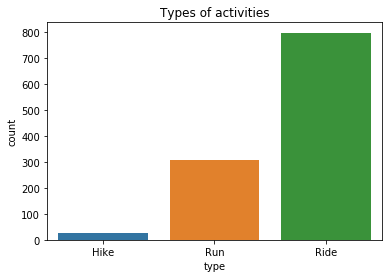

In [22]:
sns.countplot(df['type'])
plt.title('Types of activities')

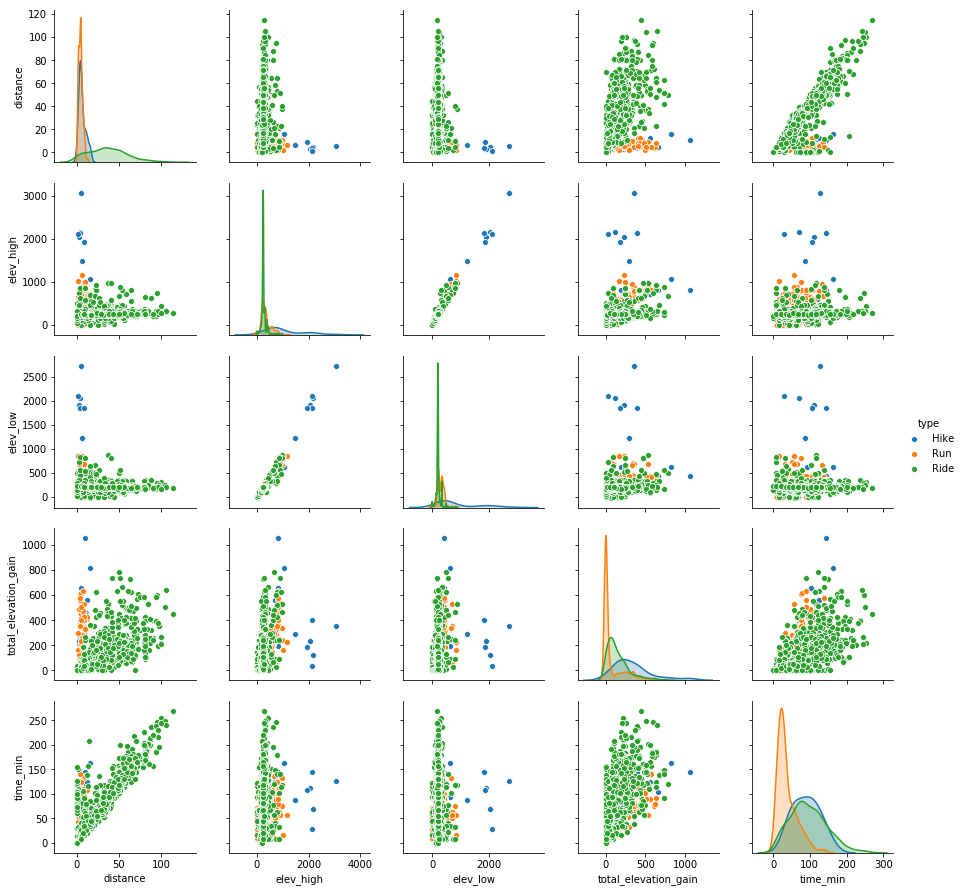

In [23]:
sns.pairplot(df, hue='type')

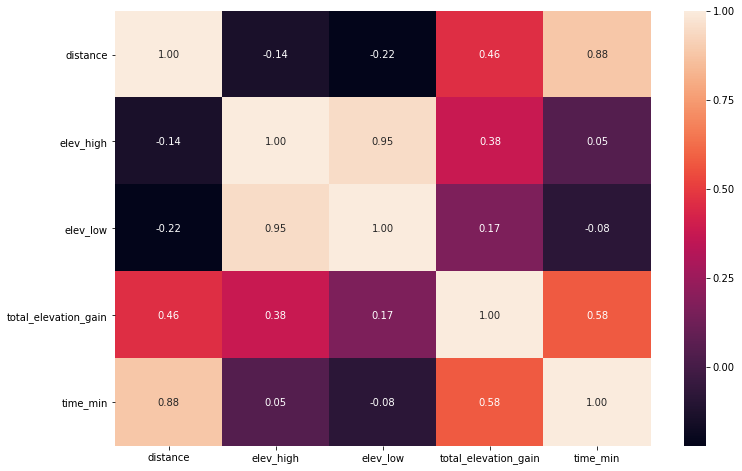

In [24]:
corr = df.corr()
plt.figure(figsize = (12,8))
sns.heatmap(corr, annot=True, fmt=".2f");

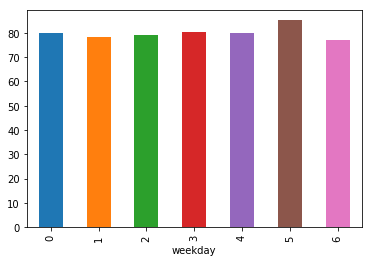

In [25]:
trends = df.copy()
trends.set_index(pd.to_datetime(trends.index), drop=True, inplace=True)
trends['weekday'] = trends.index.map(lambda x: x.weekday)
trends.groupby('weekday').mean()
trends.groupby('weekday').mean()['time_min'].plot(kind='bar')

Text(0.5,1,'Average training time by day of the week')

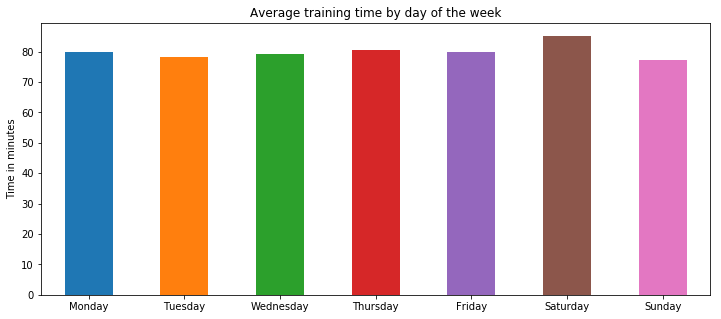

In [26]:
import calendar
list(calendar.day_name)
trends.groupby('weekday').mean()['time_min'].plot(kind='bar', figsize=(12,5));
plt.xticks(list(range(7)), list(calendar.day_name), rotation='horizontal');
plt.xlabel('')
plt.ylabel('Time in minutes')
plt.title('Average training time by day of the week')

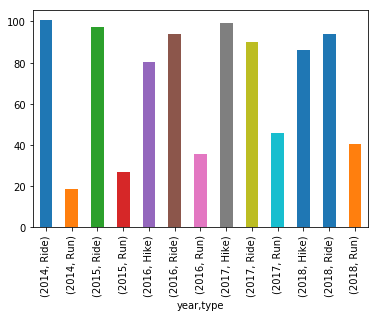

In [27]:
trends['year'] = trends.index.map(lambda x: x.year)
grouped = trends.groupby(['year', 'type']).mean()
grouped['time_min'].plot(kind='bar')

Text(0.5,1,'Yearly average for cycling and running')

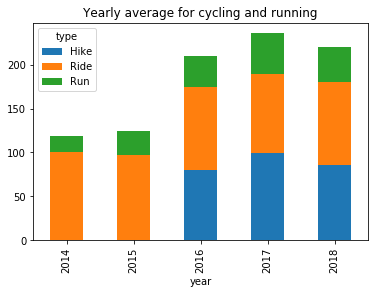

In [28]:
grouped['time_min'].unstack('type')
result = grouped['time_min'].unstack('type').fillna(0)
result.plot(kind='bar', stacked=True)
plt.title('Yearly average for cycling and running')

In [46]:
df = df[df['type']=="Ride"]
df.drop(['type'], axis=1, inplace=True)

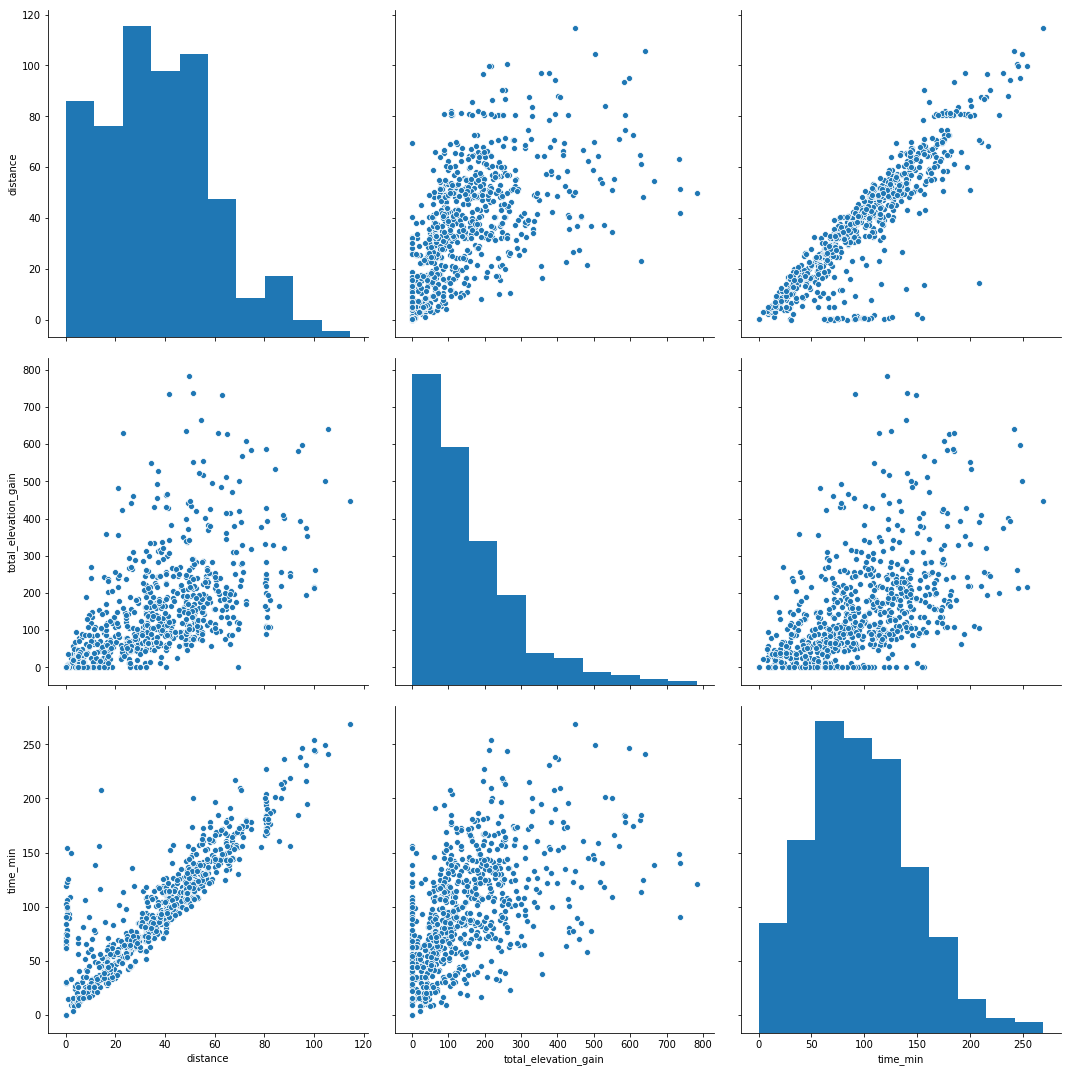

In [30]:
cols = ['distance', 'total_elevation_gain', 'time_min']
sns.pairplot(x_vars=cols, y_vars=cols, data=df, height=5)

In [31]:
df.head()

,distance,moving_time,elev_high,elev_low,start_latlng,end_latlng,total_elevation_gain,time_min
date,,,,,,,,
2018-07-12,32.19,1:33:46,16.5,-5.7,"33.9,-78.4","33.9,-78.4",150.0,94
2018-07-12,4.94,0:15:43,9.0,-3.4,"33.9,-78.4","33.89,-78.45",43.0,16
2018-07-11,24.15,1:07:17,13.6,-5.7,"33.9,-78.4","33.9,-78.4",145.8,67
2018-07-01,32.30,1:18:50,431.5,351.4,"33.51,-112.05","33.51,-112.05",201.1,79
2018-06-12,67.83,2:40:18,241.8,189.6,"42.41,-83.46","42.41,-83.46",196.0,167


In [32]:
df.drop(['start_latlng'], axis=1, inplace=True)
df.drop(['end_latlng'], axis=1, inplace=True)

/Users/tjs/anaconda3/envs/bikemap/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [33]:
df.drop(['moving_time'], axis=1, inplace=True)
df.head()

/Users/tjs/anaconda3/envs/bikemap/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,distance,elev_high,elev_low,total_elevation_gain,time_min
date,,,,,
2018-07-12,32.19,16.5,-5.7,150.0,94
2018-07-12,4.94,9.0,-3.4,43.0,16
2018-07-11,24.15,13.6,-5.7,145.8,67
2018-07-01,32.30,431.5,351.4,201.1,79
2018-06-12,67.83,241.8,189.6,196.0,167


In [34]:
X = StandardScaler().fit_transform(df)

In [35]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=4)
model.fit(X)
df['Cluster'] = model.labels_

/Users/tjs/anaconda3/envs/bikemap/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


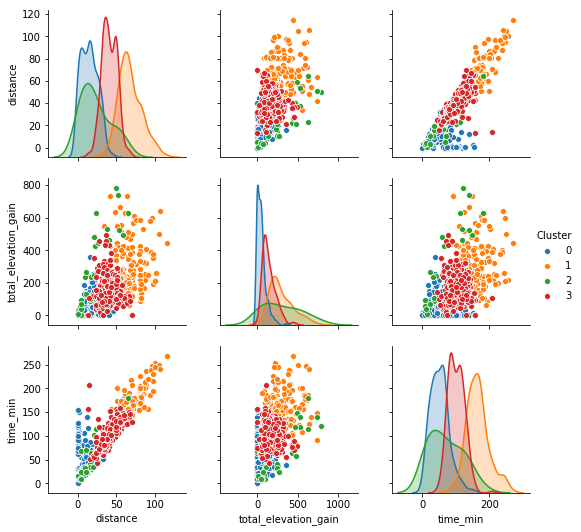

In [36]:
cols = ['distance', 'total_elevation_gain', 'time_min']

sns.pairplot(x_vars=cols, y_vars=cols, hue='Cluster', data=df)

In [37]:
df.groupby('Cluster').mean()

,distance,elev_high,elev_low,total_elevation_gain,time_min
Cluster,,,,,
0,15.355520,222.546595,192.998208,52.399642,52.344086
1,67.784000,280.546875,204.474375,299.578125,165.731250
2,23.657857,700.553571,540.842857,306.850000,71.142857
3,41.086242,282.246667,225.528788,147.536061,101.706061


In [38]:
df.groupby('Cluster').std()

,distance,elev_high,elev_low,total_elevation_gain,time_min
Cluster,,,,,
0,10.490340,69.677525,67.600592,54.780273,27.378966
1,14.664410,73.467862,44.155074,145.525285,33.347555
2,18.936694,157.145796,157.253908,233.404358,49.604147
3,9.586407,65.067065,58.433928,82.992306,23.559953
